# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Prediction of Insurance Price of an individual </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the insurance price of an individual from the given data  </span> </div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Important: </b></p>
<p style='margin-left:1em;'>
- The tasks are given to guide the flow, Few tasks can also be considered optional if there is no scope or need.<br>
- It is always encouraged to add your options to the list or flow as additional performance is always appreciated. <br>
- Not only the results but also Visualization, Inferences, Reasons, Probabilities & Implementations are equally important. <br>
- Please make sure the conclusions for the plots, results and summaries are mentioned in your own way. Add a natural comprehension to it thinking from a real time perspective. <br>
- Its always encouraged to make this process a way of conveying a story as engaging as possible. <br>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Flow of Guided Project: </b></p>
<p style='margin-left:1em;'>
- There are certain tasks given here in order to understand and extract insights from the data. <br>
- Carefully, Go through each step and provide proper reasons and explanations for the assumptions and actions.  
</p>
</span>
</div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Lets Start!!](#start)
* [Data preprocessing](#Data_preprocessing)
* [Exploratory Data Analysis, Statistical Inferences and Feature Engineering](#Statistical_Inferences)
* [Assumptions](#Assumptions)
* [Evaluation metrics](#Evaluation_metrics)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)
* [Build a predictive system](#Build)

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-I </p> </span> </div>

<div class="warning" style='padding:0.1em;  background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Interpretation of data: </b></p>
<p style='margin-left:1em;'>
    
* age: age of primary beneficiary <br>

* sex: insurance contractor gender, female, male <br>

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>

* children: Number of children covered by health insurance / Number of dependents <br>

* smoker: Smoking <br>

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>

* charges: Individual medical costs billed by health insurance <br>
</p>
</span>
</div>

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1SaRrBmZwxqUjpXHzCfYWo7L8ZQUpc7MX/view?usp=sharing' title='Google Drive'> Insurance data

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

##  <mark><span  style= "font-family: Times New Roman">Data Loading</span> </mark> <a class="anchor" id="Data_loading"></a>

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


##  <mark><span  style= "font-family: Times New Roman">Lets Start!!</span> </mark> <a class="anchor" id="start"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
- Using info(), Check the no of non-null values? <br>
- Also check if the data is in the convenient type. If not, change it to your convenience. <br>
- You may encode the data here itself, if you wish to!
</p>
</span>
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.duplicated().sum() #finding any duplicates inside dataset

1

In [8]:
df.drop_duplicates(inplace=True)  #it has 1 duplicate record drop it

##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- If there are any missing values encountered above: <br>
     Impute or remove the null data and provide the reason for that <br>
- Else: <br>
     Lets move ahead!!
</pre>
</p>
</span>
</div>

In [9]:
# Dropping the rows having null values
df  = df.dropna(axis= 0, subset= ['age', 'bmi', 'charges'])

##  <mark><span  style= "font-family: Times New Roman">Exploratory Data Analysis, Statistical Inferences and Feature Engineering </span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

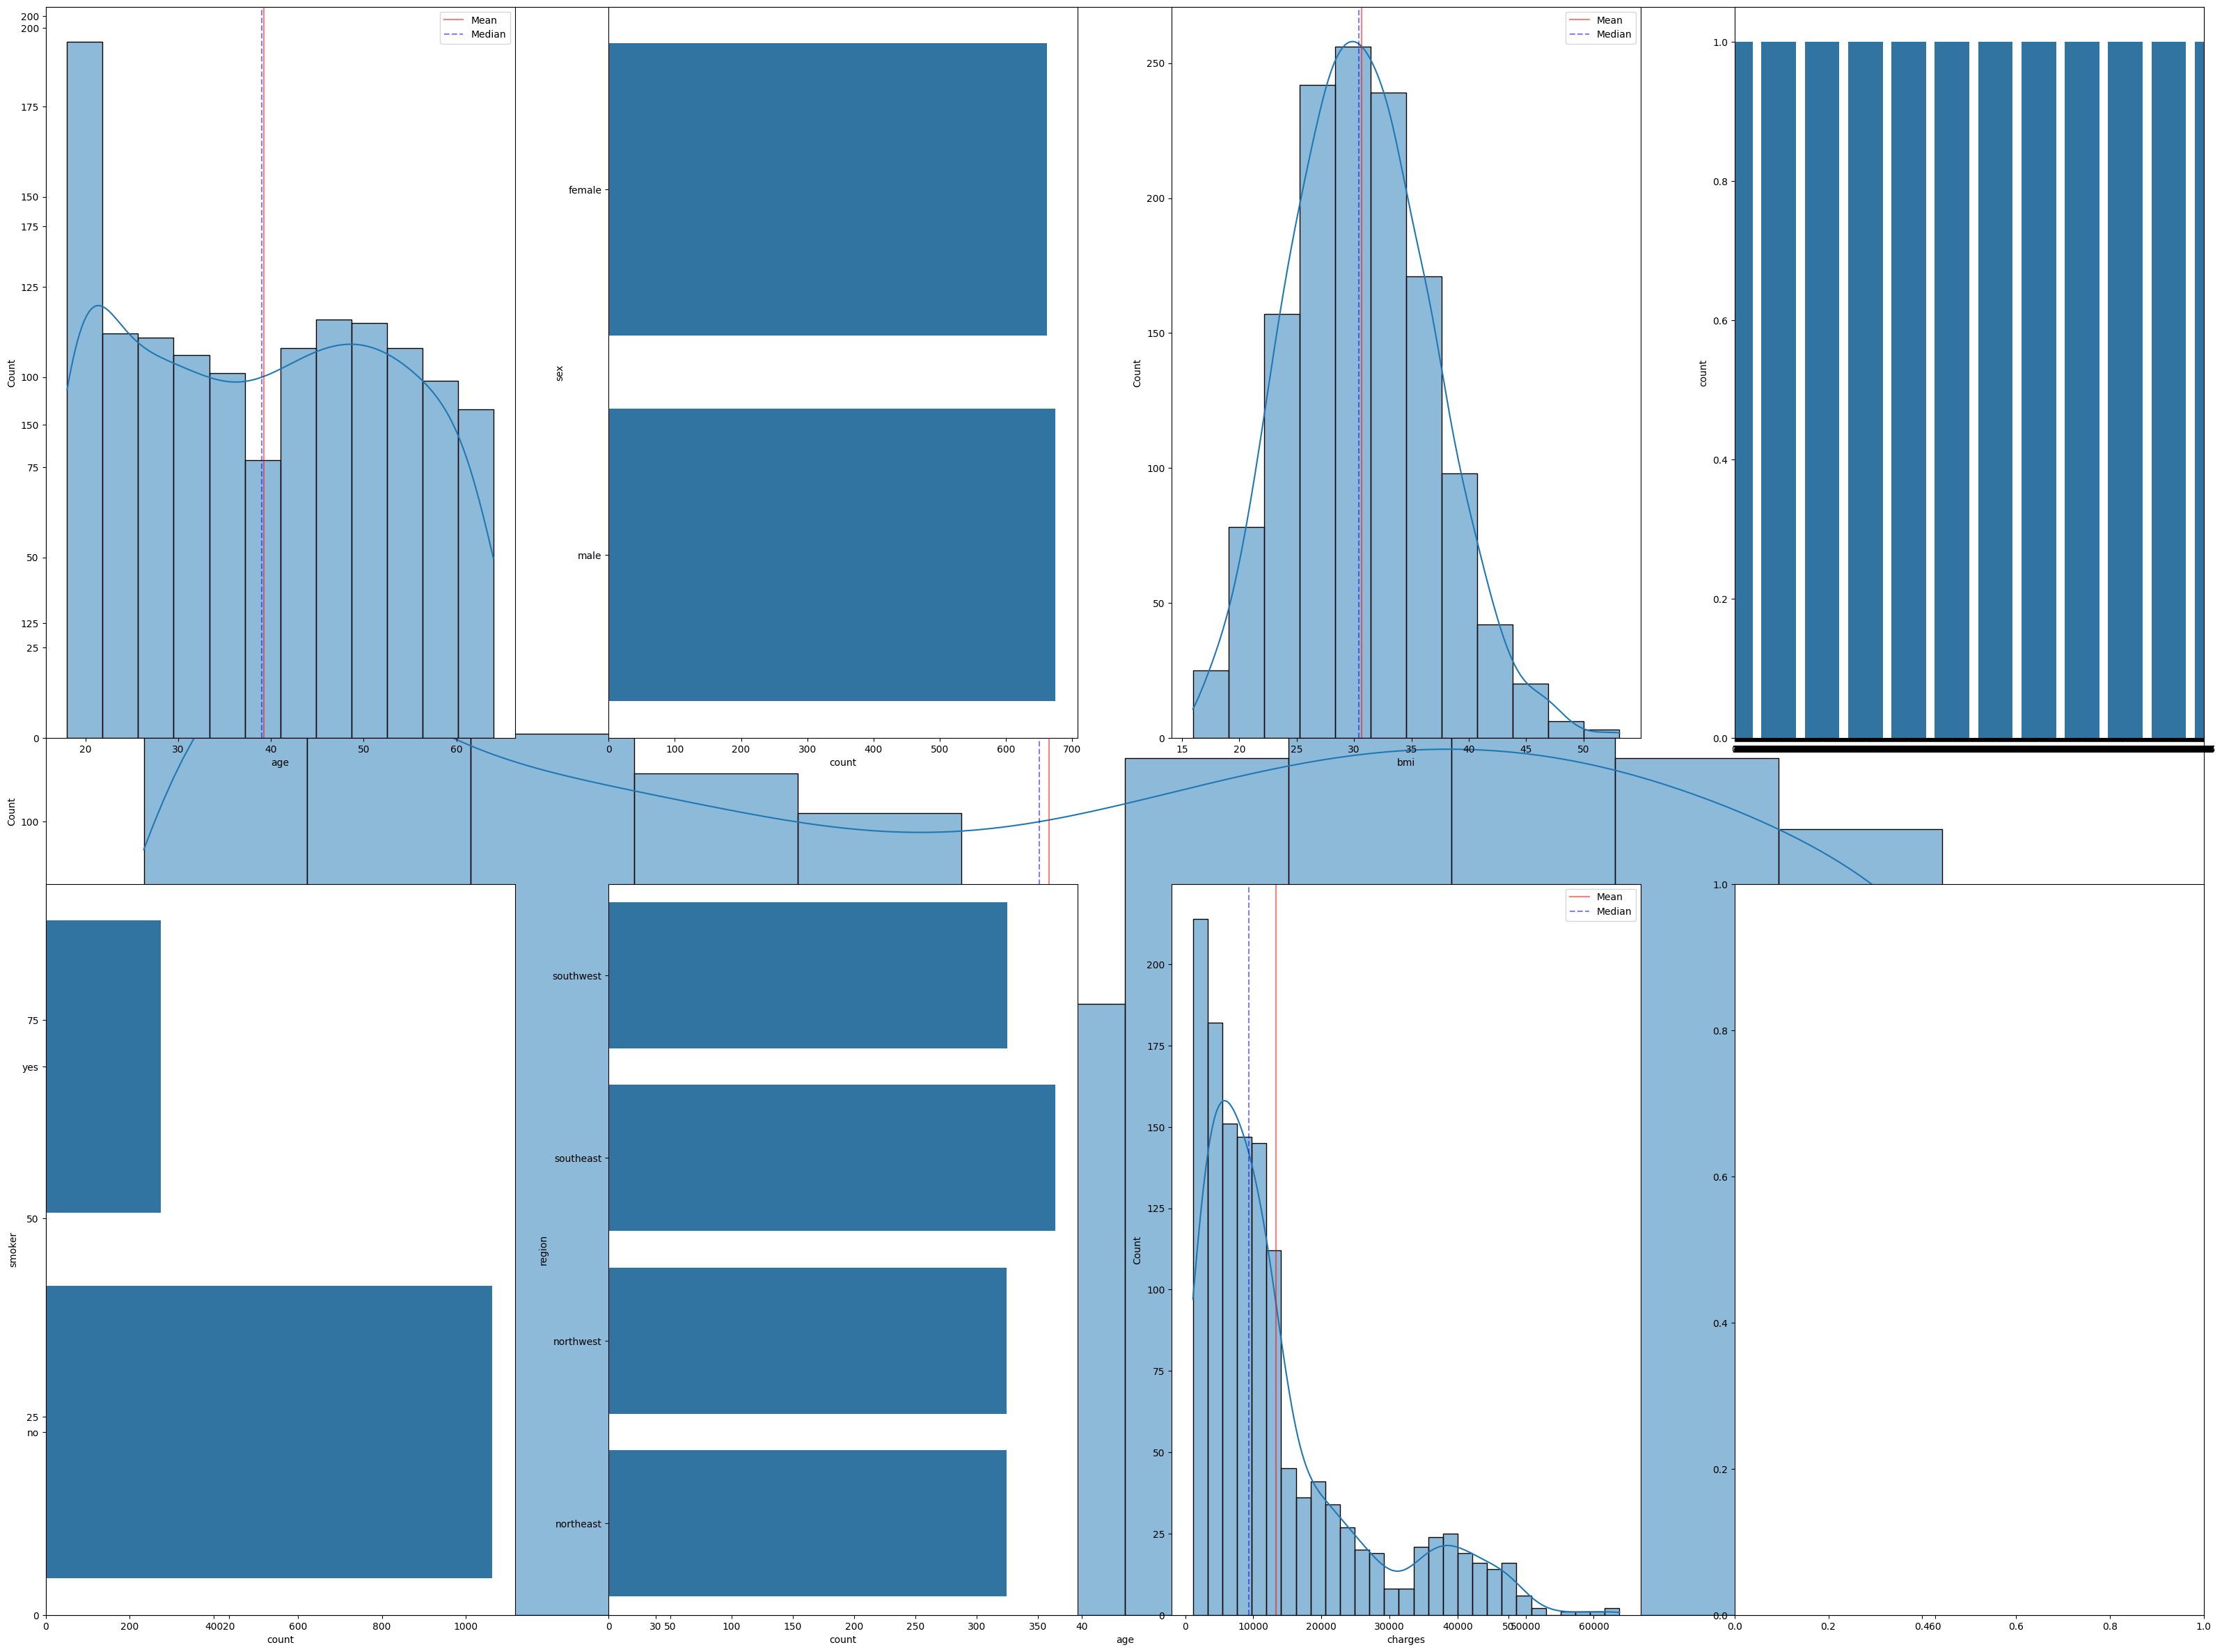

In [10]:
# Examining the distribution of all variables
plt.figure(figsize = (40, 30))

sns.histplot(data = df['age'], kde = True)
plt.axvline(x= df['age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= df['age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,1)

sns.histplot(data = df['age'], kde = True)
plt.axvline(x= df['age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= df['age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,2)

sns.countplot(df['sex'])
plt.subplot(2,4,3)

sns.histplot(data = df['bmi'], kde = True, binwidth = 3)
plt.axvline(x= df['bmi'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= df['bmi'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,4)

sns.countplot(df['children'])
plt.subplot(2,4,5)

sns.countplot(df['smoker'])
plt.subplot(2,4,6)

sns.countplot(df['region'])
plt.subplot(2,4,7)

sns.histplot(data = df['charges'], kde = True)
plt.axvline(x= df['charges'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x= df['charges'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,8)

plt.show()

1. No extreme outliers.

2. Numerical variables(features) - age and bmi are on same scale but number of children is in small scale.

3. Missing values are less than 2%. Hence they are dropped earlier.

In [11]:
# To observe relation between age and charges
px.scatter(df, x= 'age', y= "charges", color= "smoker",
           title= "Scatterplot for charges and age with smoking status", width= 800, height= 00)

1) With an increase in age , there's an increase in the insurace price.

2) People with smoking_staus = yes are having higher health insurance price

3) We can observe 3 categories in health_insurance_price with more number of people below 15k

In [12]:
px.box(df, x= 'region', y= 'bmi', title= 'Boxplot for location and BMI', height= 400, width = 600)

Observation:

More number of obese people are found in location southeast.

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'age' first:
</pre>
</p>
</span>
</div>

In [13]:
colors = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'age group' and categorize them as following: 

    - <10 : 'Less than 10' (10 is included)
    - between 10 and 20 (10 is not included, 20 is included) : '10-20'
    - between 20 and 30 : '20-30'
    - between 30 and 40 : '30-40'
    - between 40 and 50 : '40-50'
    - between 50 and 60 : '50-60'
    - from 60 upto max (not including 60) : '>60'
    
    Use pandas.cut() for converting into bins
</pre>
</p>
</span>
</div>

In [14]:
df['age group'] = pd.cut(
    df['age'],
    bins=[0, 10, 20, 30, 40, 50, 60, df['age'].max() + 1],
    labels=['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60'],
    include_lowest=True
)

### Using describe(), Answer the following questions: <br>

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1337.0,NaN,NaN,NaN,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0
sex,1337,2,male,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1337.0,NaN,NaN,NaN,30.663452,6.100468,15.96,26.29,30.4,34.7,53.13
children,1337.0,NaN,NaN,NaN,1.095737,1.205571,0.0,0.0,1.0,2.0,5.0
smoker,1337,2,no,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1337,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1337.0,NaN,NaN,NaN,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801
age group,1337,6,40-50,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age group
0,19,female,27.900,0,yes,southwest,16884.92400,10-20
1,18,male,33.770,1,no,southeast,1725.55230,10-20
2,28,male,33.000,3,no,southeast,4449.46200,20-30
3,33,male,22.705,0,no,northwest,21984.47061,30-40
4,32,male,28.880,0,no,northwest,3866.85520,30-40


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Given for 75%, age is 51, what does that mean? 
</pre>
</p>
</span>
</div>

Answer:

the age distribution is such that the majority (75%) of the individuals or observations in the dataset have an age of 51 or lower.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - How many people are aged above or equal to 75%?
</pre>
</p>
</span>
</div>

In [17]:
total_individuals = 1337
percentile_75 = 51 # The 75th percentile from the summary statistics

# Calculate the number of individuals aged above or equal to the 75th percentile
per_75 = total_individuals - (total_individuals * 0.75)

print(f"The number of people aged above or equal to the 75th percentile is: {per_75}")

The number of people aged above or equal to the 75th percentile is: 334.25


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - What count and percentile of people are aged above 45?

Note: Round your answer upto 2 digits
</pre>
</p>
</span>
</div>

In [18]:
from scipy.stats import percentileofscore

# Assuming 'df' is the name of your DataFrame and 'age' is the column containing ages
above_45_count = len(df[df['age'] > 45])
total_count = len(df)
percent_above_45 = percentileofscore(df['age'], 45)

print(f"Count of people aged above 45: {above_45_count}")
print(f"Percentile of people aged above 45: {round(percent_above_45, 2)}%")

Count of people aged above 45: 500
Percentile of people aged above 45: 61.56%


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Which group of people has highest amount of smokers?
</pre>
</p>
</span>
</div>

C:\Users\Admin\AppData\Local\Temp\ipykernel_12356\3854994761.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

C:\Users\Admin\AppData\Local\Temp\ipykernel_12356\3854994761.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a 

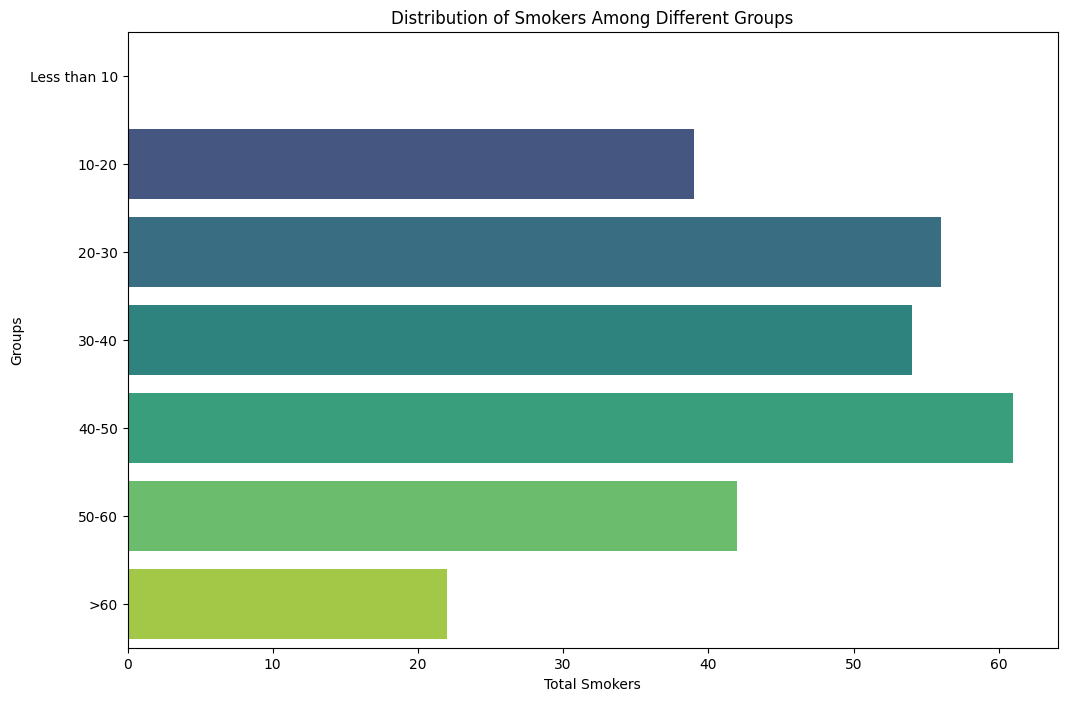

In [19]:
# Group by 'age group' and count the number of smokers
smoker_counts = df.pivot_table(index='age group', columns='smoker', aggfunc='size', fill_value=0)

# Calculate the total number of smokers for each group
smoker_counts['Total Smokers'] = smoker_counts['yes'].astype(int)

# Sort the DataFrame by the total number of smokers in descending order
smoker_counts = smoker_counts[['Total Smokers']].sort_values(by='Total Smokers', ascending=False)

# Reset the index before plotting
smoker_counts_reset = smoker_counts.reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Smokers', y='age group', data=smoker_counts_reset, orient='h', palette='viridis')
plt.xlabel('Total Smokers')
plt.ylabel('Groups')
plt.title('Distribution of Smokers Among Different Groups')
plt.show()


Observation:

According to the above Data / Graph, People in the Age Group of 40-50 have the highest number of Smokers

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Sample plot: </b></p>
<p style='margin-left:1em;'>
<pre> - Using sns.countplot() and plt.pie(), plot a count plot and pie plot for age group.
</pre>
</p>
</span>
</div>

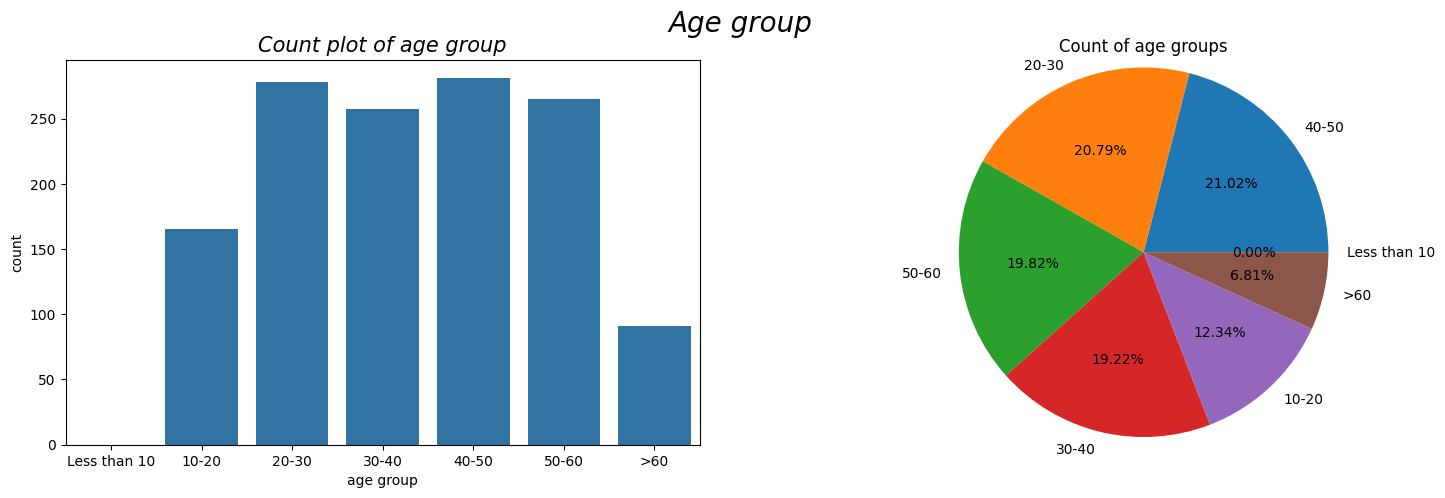

In [20]:
column = 'age group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
- Observe the above plot and format given, Now..
- Define a function giving input as column name such as def plot_data(column_name):
- In that, 
- Using sns.histplot(), sns.distplot(), sns.boxplot() plot the histogram plot, distribution plot and box plot for the age feature

### Use the below code for histogram and distribution plot.
Hint: 
sns.histplot(ax=axes[0],x=column,data=df,color=colors[1])
axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=colors)
axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
        df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

Try to write the code for box plot as third subplot as shown above.

Image is given below!!
</pre>
</p>
</span>
</div>

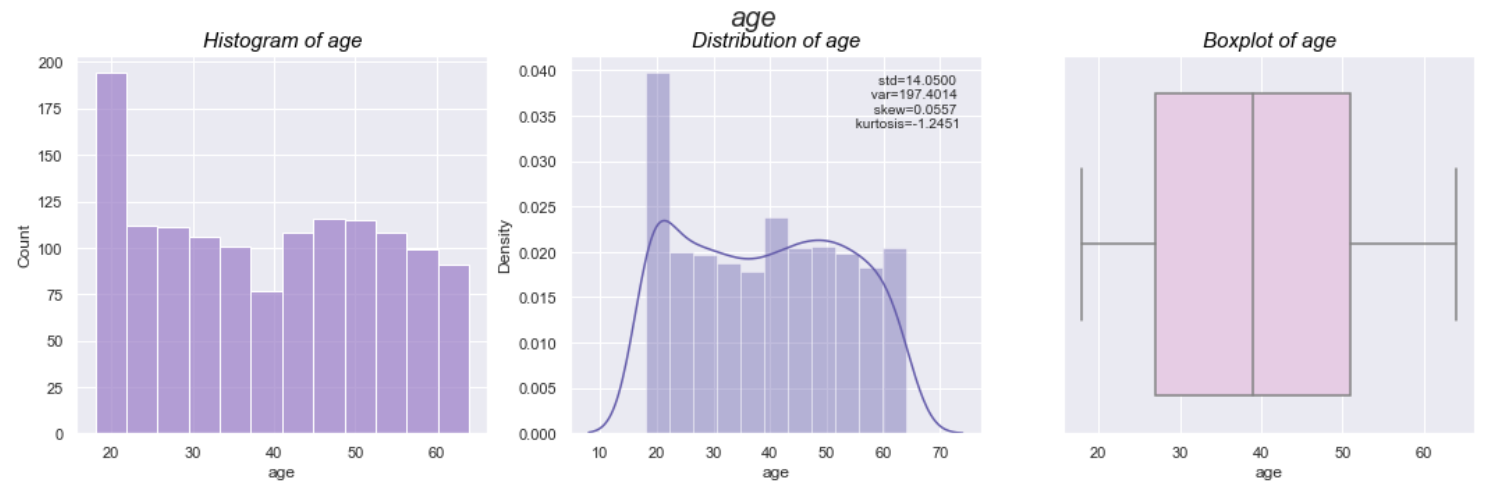

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



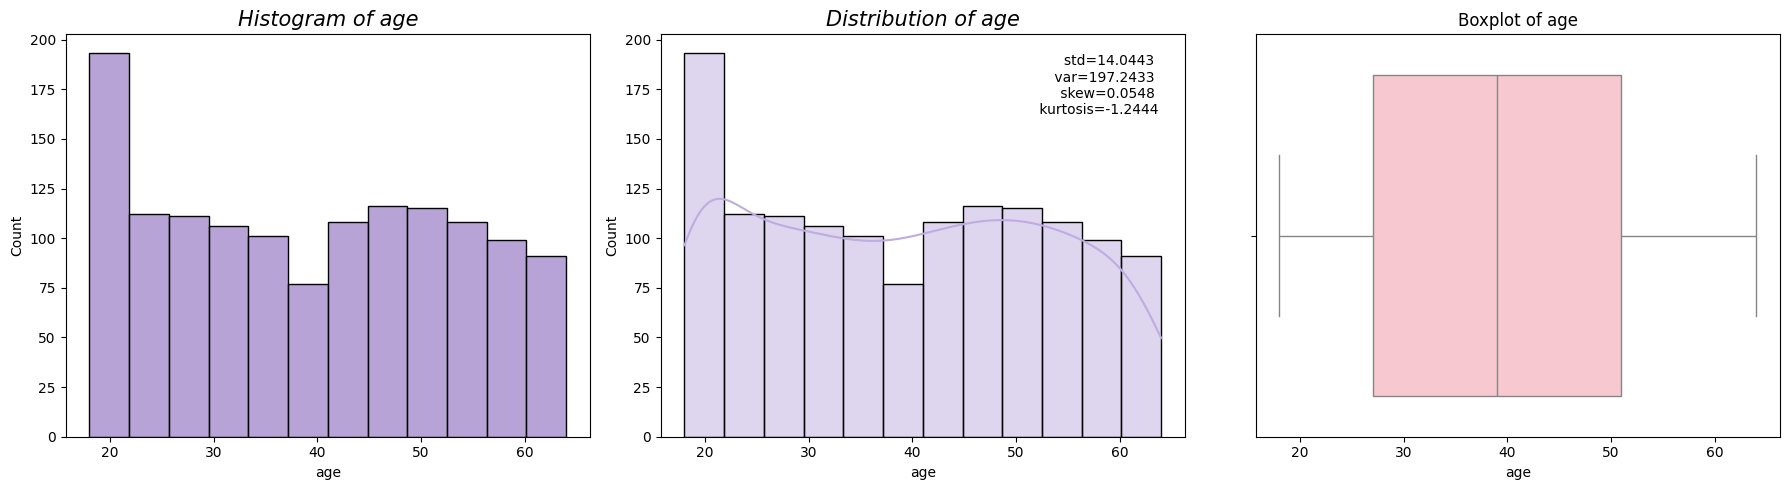

In [21]:
# Specify the column and colors
column = 'age'

# Create subplots in a single row
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

# Plot the histogram using histplot
sns.histplot(ax=axes[0], x=df[column], color=colors[1])
axes[0].set_title('Histogram of {}'.format(column), fontstyle='italic', fontsize=15, color='black')

# Plot the distribution using histplot with kde
sns.histplot(ax=axes[1], x=df[column], kde=True, color=colors[2])
axes[1].set_title('Distribution of {}'.format(column), fontstyle='italic', fontsize=15, color='black')
axes[1].set_xlabel(column)  # Set xlabel for the distribution plot

axes[1].text(.95, .95, 'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(
    df[column].std(), df[column].var(), df[column].skew(), df[column].kurtosis()),
    ha='right', va='top', transform=axes[1].transAxes)

# Creating a boxplot of age
sns.boxplot(ax=axes[2], x=df['age'], color='pink')
axes[2].set_title('Boxplot of {}'.format(column))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12356\4110578087.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



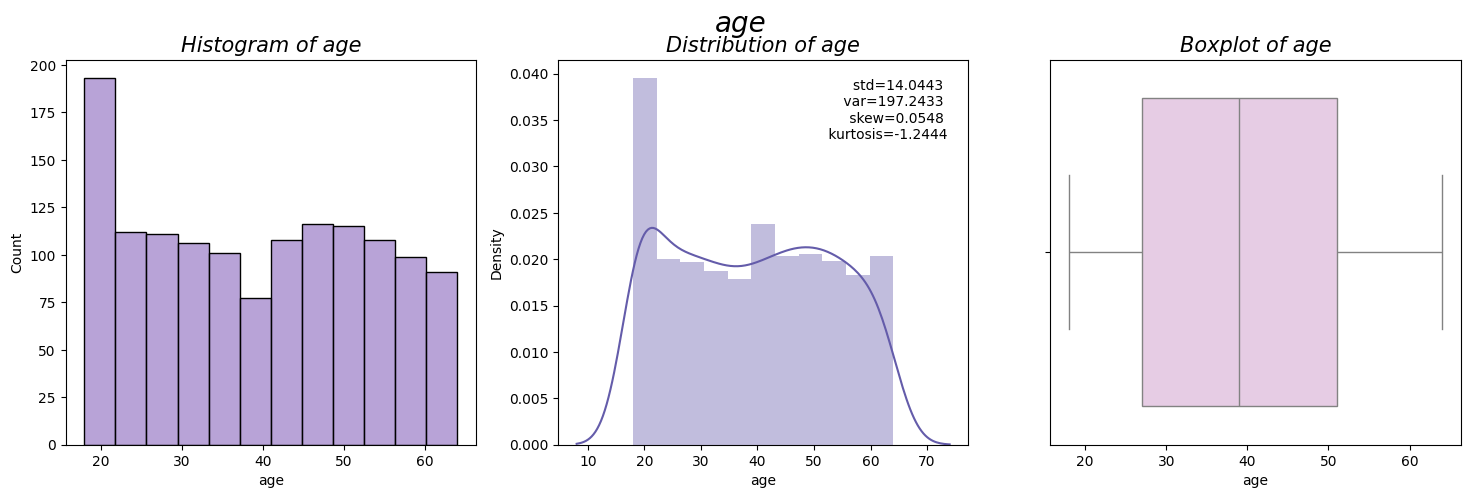

In [28]:
column = 'age'
def plot_data(column):
    ###figsize is given along with the rows=1 and columns=3
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    # super title is given with fontsize
    fig.suptitle(column,fontsize=20,fontstyle='oblique')

    ###Histogram is plotted, axes[0] gives the sequential plot number, color is given from the colors list
    sns.histplot(ax=axes[0],x=column,data=df,color=colors[1])
    ###Title name is formatted with custom fontsize
    axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

#Distribution plot is plotted with axis label as column name
    sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=colors[0])
    # Title name of the distribution plot
    axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    # axes[0].set_title('Histogram of {} \n std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(column, ⁠Browse Channels df[column].std(),df[column].var(),df[column].skew(),df[column].kurtosis()),fontsize=15)
    plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
                df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

    # Box plot is made to check the Inter Quartile range and the stats inferences
    sns.boxplot(ax=axes[2],x=column,data=df,color=colors[3])
    # Title of box plot is set and there it goes!! 
    axes[2].set_title('Boxplot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    plt.show()
plot_data('age')

### NOTE

the code was giving error with distplot saying it has been discontinued so had to use histplot

In [23]:
plot_data('age')

NameError: name 'plot_data' is not defined

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
For a chosen random variable, find the probability that:
    1. the person has age 43
    2. the person is from group 40-45 (both inclusive)
    3. has age greater than 45
   Plot the distribution plot for second one using seaborn - sns.distplot()
   To plot distribution plot for the second one, you need to encode the feature. 
   So, using LabelEncoder(), Encode the features and assign them in a seperate feature named 'age grp encode'.   
Note: Round off to two digits
What kind of distribution is it? 
</pre>
</p>
</span>
</div>

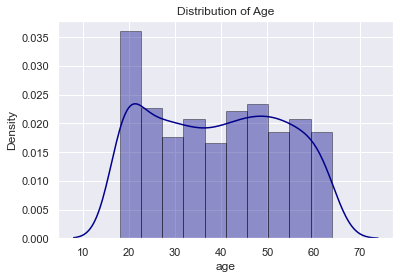

Probability of having age 43: 0.02
Probability of being in the age group 40-45: 0.1
Probability of having age greater than 45: 0.37


C:\Users\Admin\AppData\Local\Temp\ipykernel_14256\572608691.py:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




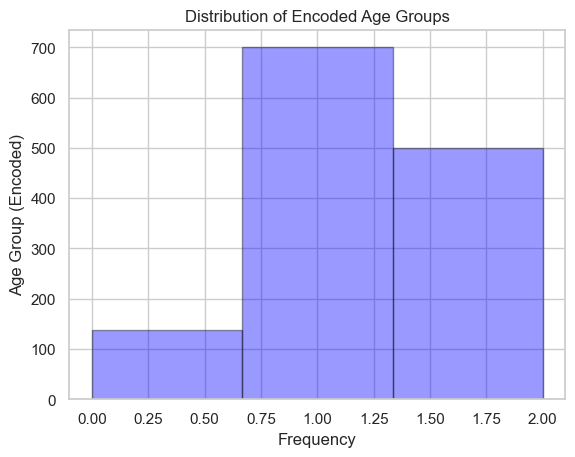

In [25]:
from sklearn.preprocessing import LabelEncoder

# 1. Probability that the person has age 43
prob_age_43 = round((df['age'] == 43).mean(), 2)
print(f"Probability of having age 43: {prob_age_43}")

# 2. Probability that the person is from group 40-45 (both inclusive)
label_encoder = LabelEncoder()
df['age_grp_encode'] = label_encoder.fit_transform(pd.cut(df['age'], bins=[-float('inf'), 40, 45, float('inf')], labels=['<40', '40-45', '>45']))

prob_age_40_45 = round((df['age_grp_encode'] == label_encoder.transform(['40-45'])[0]).mean(), 2)
print(f"Probability of being in the age group 40-45: {prob_age_40_45}")

# 3. Probability that the person has age greater than 45
prob_age_gt_45 = round((df['age'] > 45).mean(), 2)
print(f"Probability of having age greater than 45: {prob_age_gt_45}")

# Create a distribution plot for the age group
sns.set(style="whitegrid")
sns.distplot(df['age_grp_encode'], bins=3, kde=False, color='blue', hist_kws={'edgecolor': 'black'})
plt.xlabel('Age Group (Encoded)')
plt.ylabel('Frequency')
plt.title('Distribution of Encoded Age Groups')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'sex' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'sex' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot with respect to smokers feature as subplots as shown for age feature. Draw your inferences
- Which pair of categories share the highest percentage? 
- Hint hue or value_counts() function to plot. 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
It is claimed that There are almost equal smokers in men and women. Find out if its true?
Note: Encode the data before using it for statistical tests
</pre>
</p>
</span>
</div>

In [ ]:
# Encoding sex Column

# Encoding smoker column

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'smoker' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'smoker' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'bmi' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'BMI group' and categorize them as following: <br>
    - < 18.5 : 'Under weight'
    - 18.5 - 25 : 'Healthy weight' 
    - 25 - 30 : 'Overweight'
    - 30 - 40 : 'Obese'
    - >=40 : 'Severely Obese'
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plot for the bmi feature
</pre>
</p>
</span>
</div>

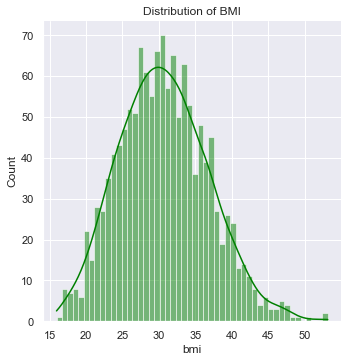

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Do obese people have to pay high insurance price? Please perform a statistical test suitable to this and give your opinion on this? 
- Note: You can choose either 'BMI' or 'BMI group' for this. Choose the test accordingly. 
You can also encode 'BMI group feature' and perform the above needed one.
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Visualize the above scenario using a plot. How do you visualize it in the most informative way? 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'children' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'children' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is count and percentage of people having more than 2 children?
Note: Round the percentage to 2 digits
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create a new dataframe df_1 with region data as index and children categories as column
- It should be in a similar to the data shown in the image here:
- Hint: Use pandas.crosstab() function with index as region, columns as children, aggregation_function as count. 
</pre>
</p>
</span>
</div>

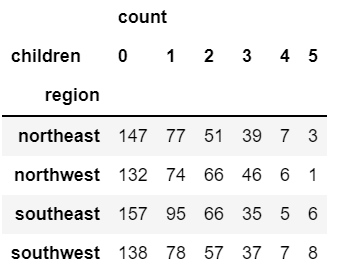

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- From the above dataframe, create a new feature 'Total' from the above dataframe df_1
- Create one more feature Average, and calculate row wise mean() as in figure
- Follow the below image for hints:
- Use sum() function and axis=1 in it.
</pre>
</p>
</span>
</div>

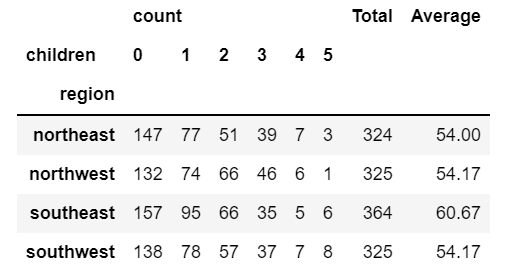

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'region' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plots w.r.t 'region feature
</pre>
</p>
</span>
</div>

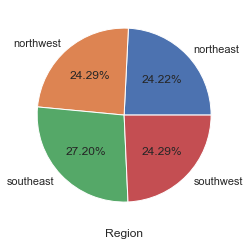

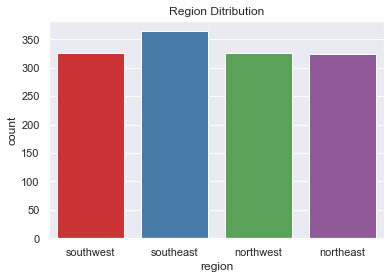

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'charges' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create charges mean based on direction using pandas.pivot_table()
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- How many people got billed above 15000 in insurance? What percentage of total amount do they contribute to?
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is maximum charges billed by health insurance and to whom(Index)?
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Which age group paid the highest charges by total? 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- The below image shows the charges distribution of smoker(red: non-smoker, green:smoker)
- Plot a histogram for charges classifying both smokers and non-smokers (Consider your convenient axes scale)
- Find areas from your plot, where given a new charge, probability of a smoker is higher than a non-smoker
- For example, from the plot if a charge 32000 is estimated, the probability of non-smoker is higher than a smoker.
- After performing this, Kindly frame a conclusion if this is a good feature to consider or not. 
</pre>
</p>
</span>
</div>

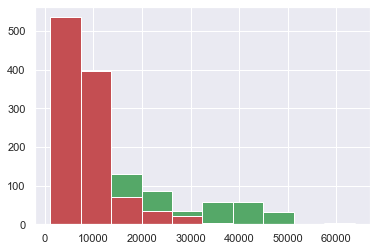

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Repeat the above similar process replacing smoker by sex. Give your insights. 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Calculate correlation using corr() function and plot a heatmap for the correlation and use palette = 'viridis'
</pre>
</p>
</span>
</div>

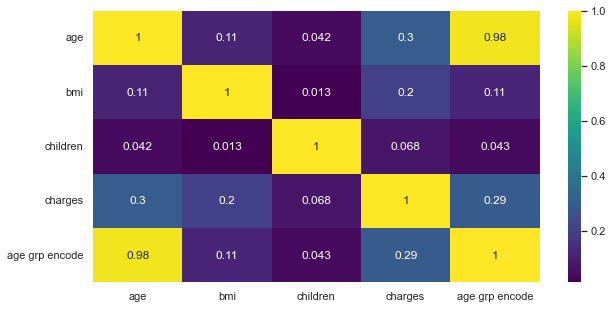

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- A family is requesting you to estimate the price for the insurance given: 
    condition-1: There are 4 people in family, They are no smokers in the family.
    condition-2: They have 2 children with them aged 14 and 17
    condition-3: Four people in the family, Father aged 42 and mother aged 40. 
    Based on the information above, Show them the data that is approximately similar (needn't be exact) to this family. 
    Collectively, what can be the insurance price collectively to be paid by the family? 
</pre>
</p>
</span>
</div>

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-II </p> </span> </div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to build a model for prediction. Before that, Encode all the categorical features to train the model. 
Hints: Use pandas.replace() or pandas.map() to encode the variables
You can also use LabelEncoder to label the data. 
You can also pandas.get_dummies() to segregate the categorical data. 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to scale the numerical features. 
You can use any scalers. Standard Scaler, Minmax scaler, Robust Scaler. Mention the reasons. 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Why do you think we need to scale the features? 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Remove unnecessary features. 
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Now, the data is cleaned and preprocessed. Lets build the model using Linear Regression
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Split the data into train data and test data using train_test_split() in the ratio 4:1
</pre>
</p>
</span>
</div>

In [ ]:
# Run this cell
X = df.drop('charges',axis=1)
y = df['charges']

In [ ]:
# Run this cell
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('Train size: ',X_train.shape,y_train.shape)
print('Test size: ',X_test.shape,y_test.shape)

Train size:  (1070, 6) (1070,)
Test size:  (268, 6) (268,)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform the Linear Regression for the whole data to create a summary and understand the assumptions. Follow the steps and run the below cells. 
- Run the below cell. You need not right any code in the cells that mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [ ]:
# Run this cell
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [ ]:
# Run this cell
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X, y)}')

Coefficients: [ 0.29850404 -0.01083068  0.16747093  0.03959935  1.96773894  0.02921321]
Intercept: -0.48420733327933374
R^2 score: 0.7507372027994937


##  <mark><span  style= "font-family: Times New Roman">Assumptions: </span> </mark> <a class="anchor" id="Assumptions"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumptions for Linear Regression:
Lets check the extent upto where the assumptions of Linear Regression is valid:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform Ordinary least squares to understand these assumptions. 
- Run the below cell. You need not right any code in the cells that are mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [ ]:
# Run this cell to understand the summary.
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:25:42   Log-Likelihood:                -969.13
No. Observations:                1338   AIC:                             1952.
Df Residuals:                    1331   BIC:                             1989.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4842      0.030    -16.019      0.000      -0.544      -0.425
age            0.2985      0.014     21.647      0.000       0.271       0.326
sex           -0.0108      0.027     -0.394      0.694      -0.065       0.043
bmi            0.1675      0.014     11.997      0.000       0.140       0.195
children       0.0396      0.011      3.483      0.001       0.017       0.062
smoker         1.9677      0.034     57.839      0.000       1.901       2.034
region         0.0292      0.013      2.328      0.020       0.005       0.054
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-1 : No Autocorrelation.
From the above summary, Note the Durbin Watson value.
Durbin-Watson test is a statistical test that works for finding autocorrelation value. It lies generally between 0-4.
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Durbin watson value and Write an if statement to print:
"Positive Correlation" for value greater than 2
"Zero correlation" for value equal to 2
"Negative Correlation" for value lesser than 2
</pre>
</p>
</span>
</div>

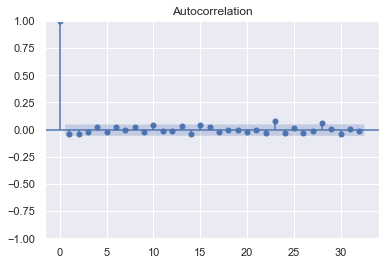

In [ ]:
# Run the cell below
# this plot is called autocorrelation plot. you will be working on this later in the course.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid,alpha=0.05)
acf.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-2 : Normality of Residuals.
From the above summary, Note the Jarque bera value.
Normality is an assumption for many statistical tests. Jarque-bera value is a test for checking normality. 
We are performing this here to check the normality for the different of actual and predicted values.
</pre>
</p>
</span>
</div>

In [ ]:
# Run the below cell
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=713.9748044872917, pvalue=0.0)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Jarque bera value and p-value as 0.05 and Write an if statement to print:
"Normal distribution" for value greater than p-value
"Non-normal distribution" for value lesser than p-value
</pre>
</p>
</span>
</div>

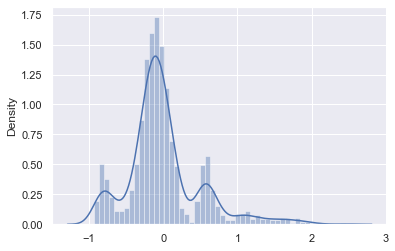

In [ ]:
# Validate your above answer by running the cell
import seaborn as sns
sns.distplot(lin_reg.resid)
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Asssumption 3 - Linearity of residuals
Run the below cell to check the Linearity in the model
</pre>
</p>
</span>
</div>

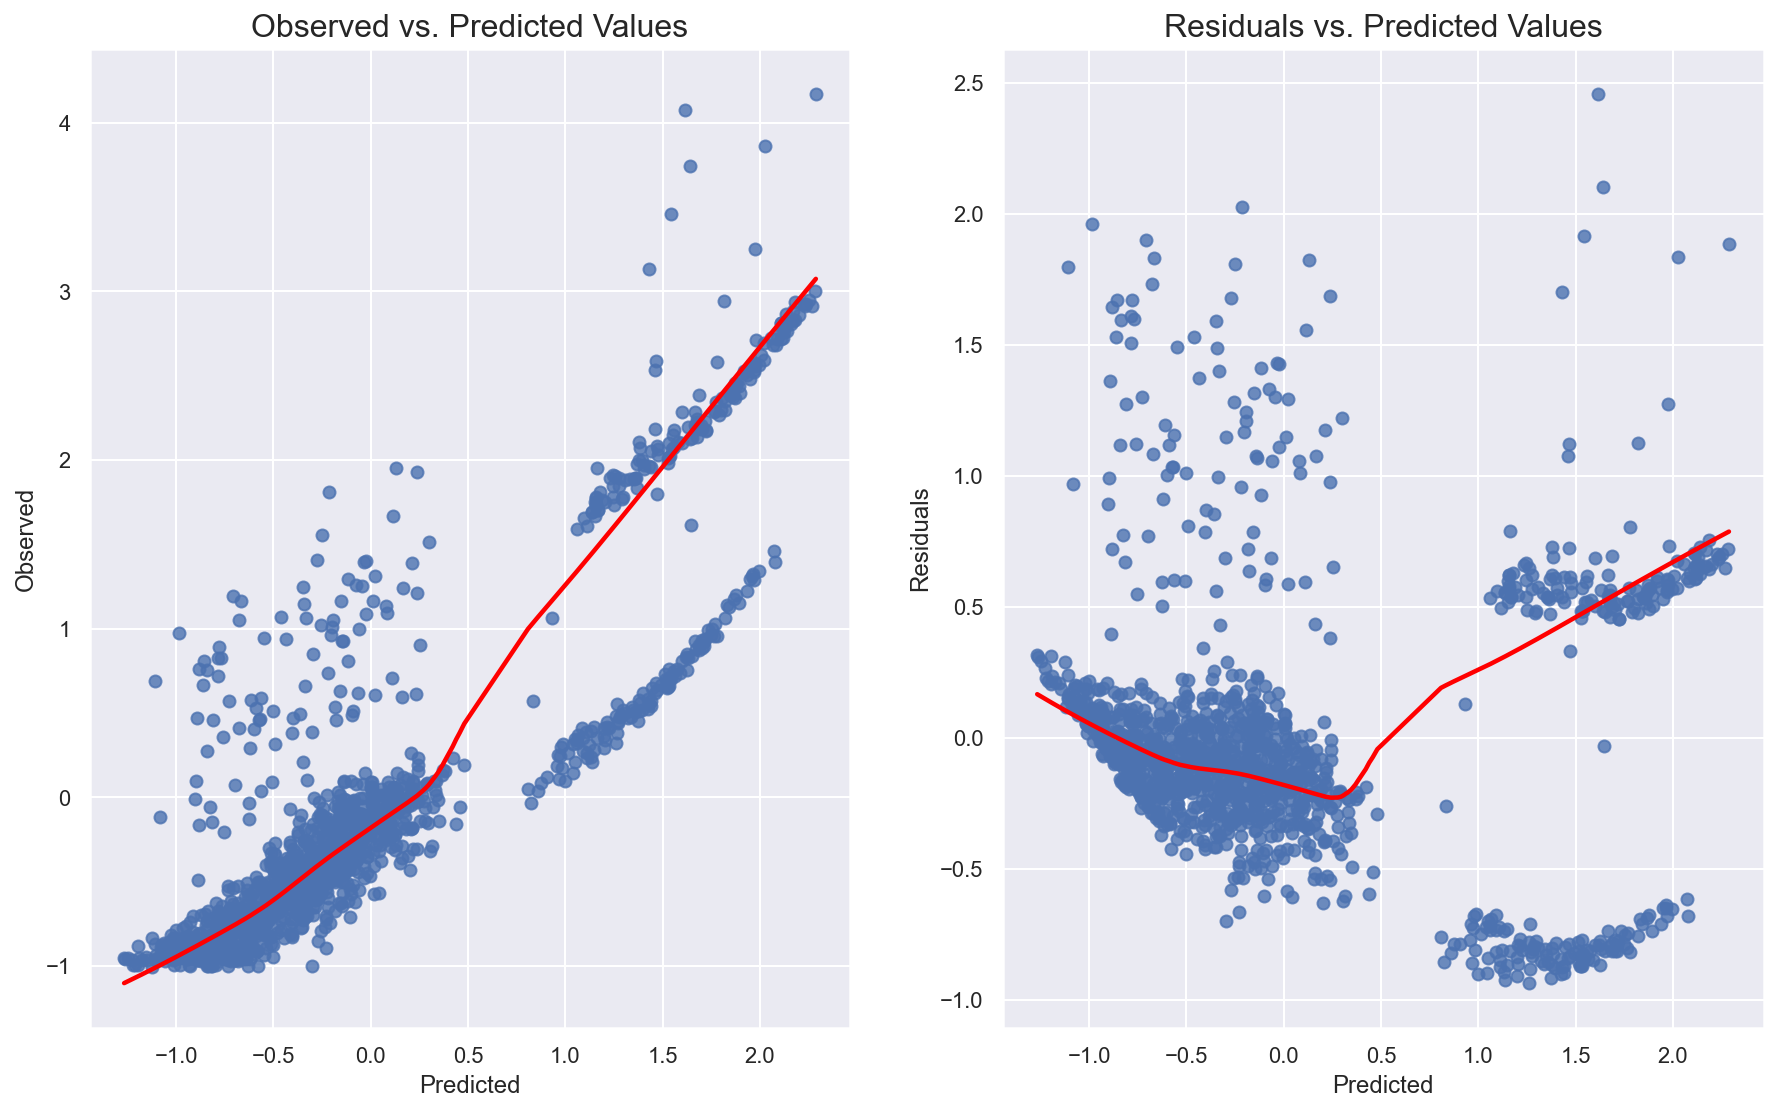

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

# function to test the linearity. Input the model(Linear Regression and the output)
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    # Finding the predictions from the model
    fit_values = model.predict()
    #Residuals 
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    # Plotting a regression plot for the above found values
    sns.regplot(x=fit_values, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Run the below cell to perform Rainbow test. 
Rainbow test is performed to test linearity. Even though there is no good linearity, it can be used to achieve the linearity from a subsample data.
</pre>
</p>
</span>
</div>

In [ ]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.1339499149847379, 0.05261918323237715)

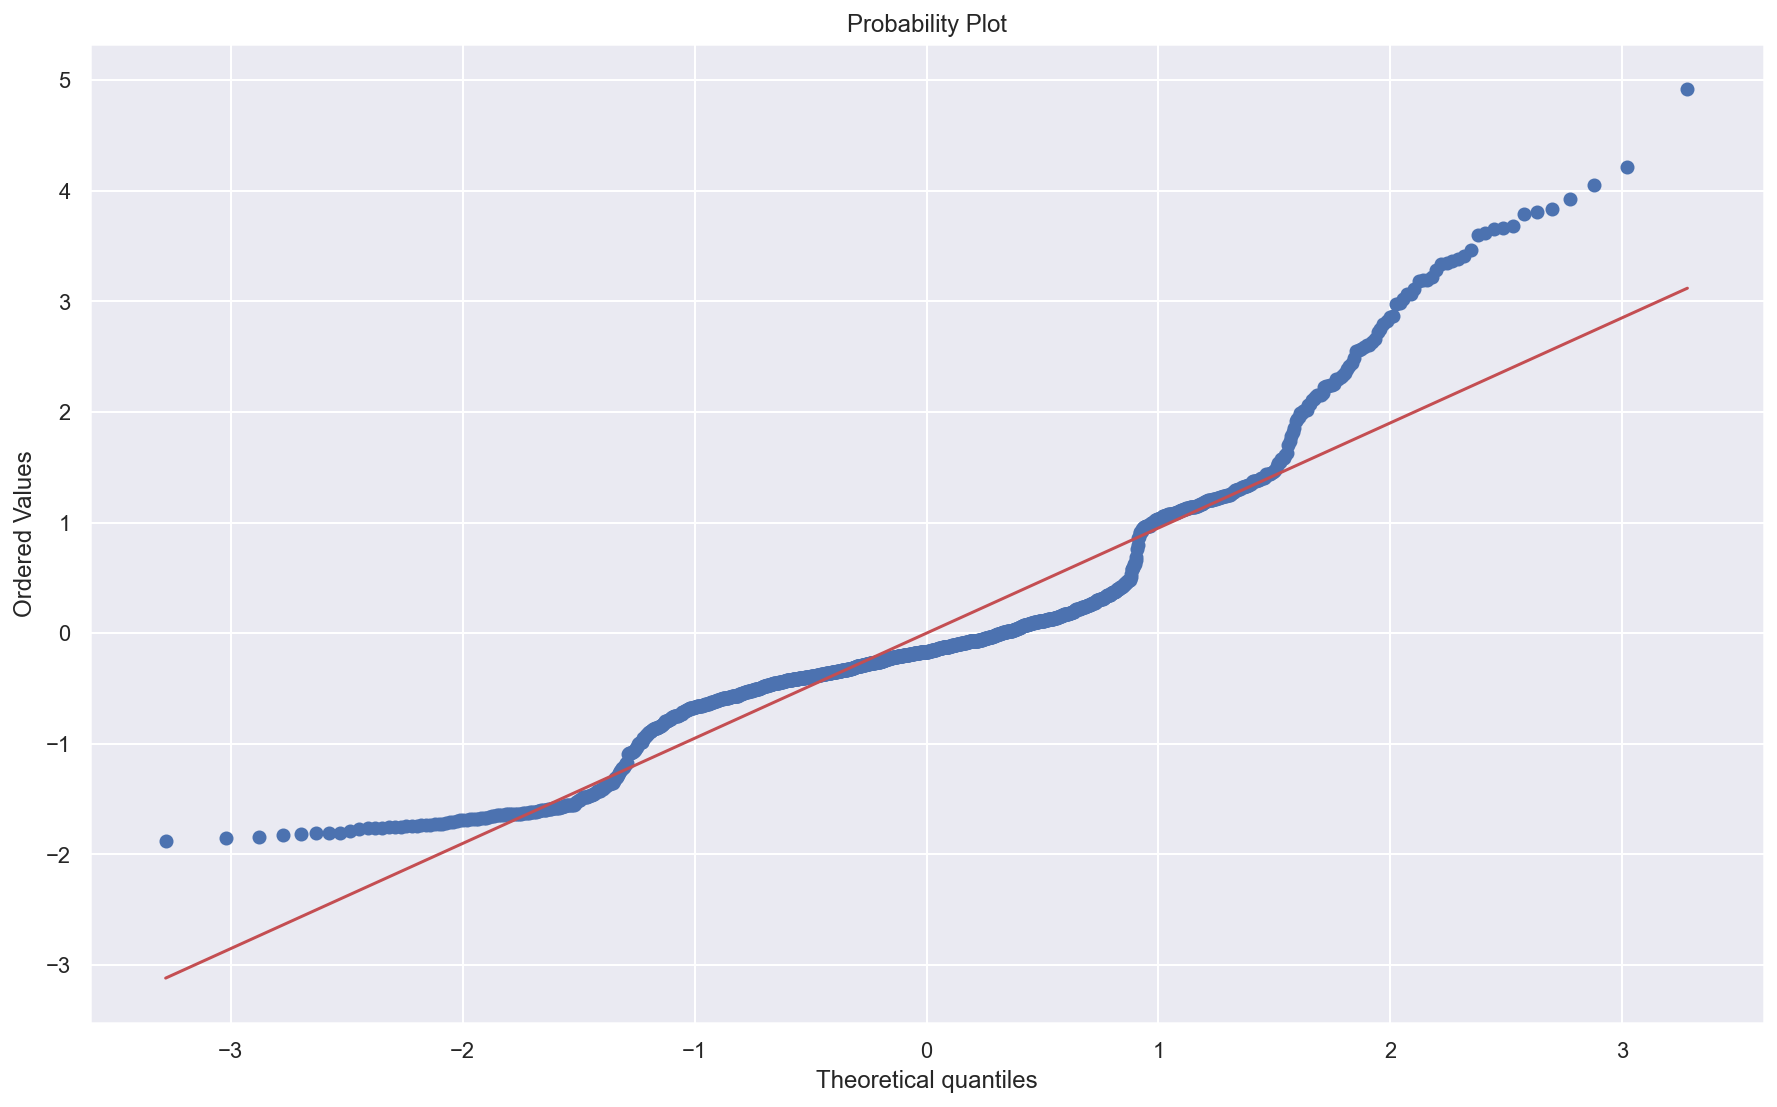

In [ ]:
# Run the below cell and understand the residual distribution
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
# We are plotting studentized residuals
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [ ]:
lin_reg.resid.mean()
# As the value is very much close it zero .We can say linearity is present.

1.0233468283035916e-15

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Run the below cell to check the homoscedasticity in the model
</pre>
</p>
</span>
</div>

**We are plotting the same as above plots, but for checking homoscedasticity (uniform variance)**

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

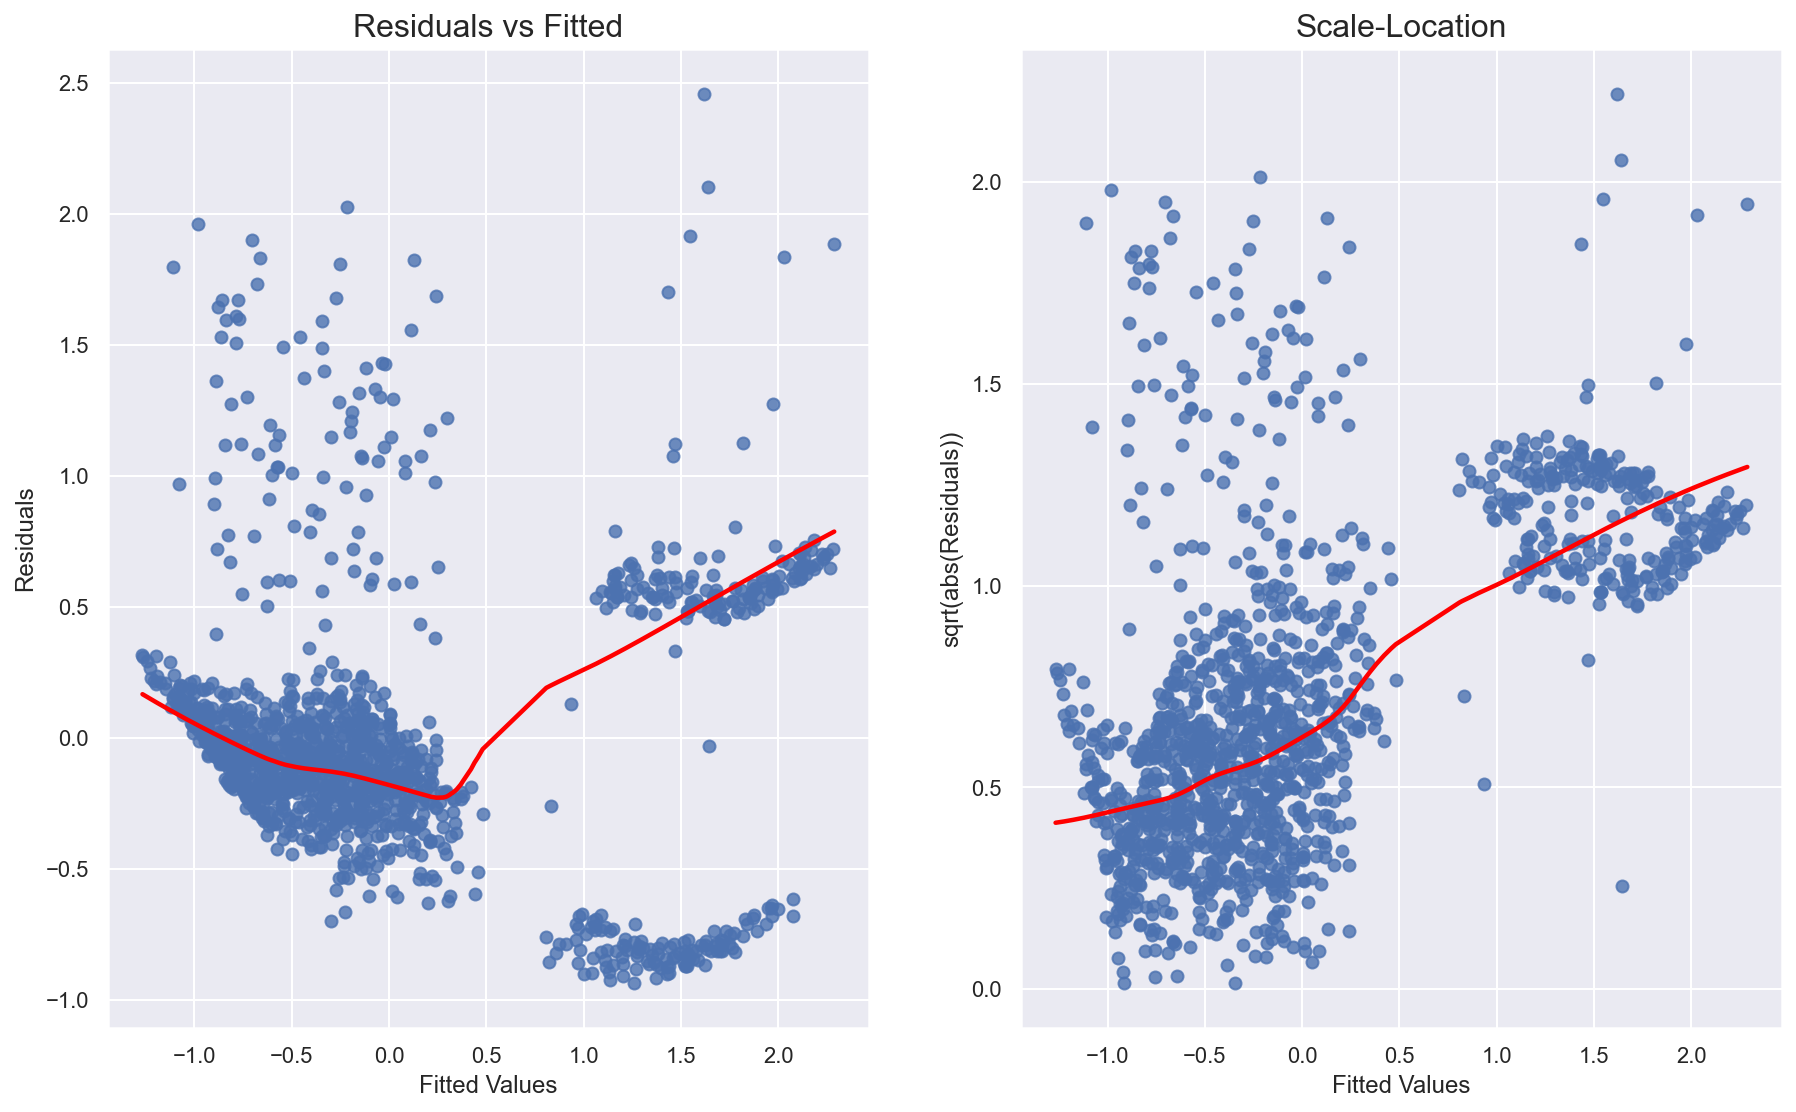

In [ ]:
from statsmodels.compat import lzip
from statsmodels.compat import lzip

model = lin_reg
resids = model.resid
fit_values = model.predict()
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

# Regression plots for residual values and predicted values
sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

# Regression plots for scaled residuals and predicted values
sns.regplot(x=fit_values, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [ ]:
# Goldfeld quandt test is used to check the homoscedasticity in regression analysis
# Run the below cell
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# WE fail to reject the null hypothesis which is Homoscedasticity is present and we can continue with the original regression

[('F statistic', 0.9566557936681559), ('p-value', 0.7155988668351111)]

In [ ]:
print('p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.')

p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 5- NO MULTI COLLINEARITY
Run the below cell to check the Multicollinearity in the model
We use Variation inflation factors. The name itself says to determine the factors that inflate the variance if any additional variable is added to the regression.
</pre>
</p>
</span>
</div>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We added this constant in summary
# The constant term is checked with every feature in the data and the measure is calculated. 
# If there is a very huge value for vif, then there might be chance of high collinearity 
# Here, there are no such high ranges, so it is fine to assume no multicollinearity and proceed with original regression.
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.set_option("display.Max_columns",None)
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,sex,bmi,children,smoker,region
vif,1.015394,1.008889,1.040608,1.002482,1.006466,1.025966


### By now, we have completed checking the assumptions for Linear Regression. 
### Now, we are ready to build the model with train and test data and check the working of the model.

In [ ]:
# As the data is split into train data and test data, Lets start the model
# Step-1: Create an instance of the Linear Regression, use fit() to fit the model to the input data
# Step-2: USe predict() and predict the output for test data

##  <mark><span  style= "font-family: Times New Roman">Evaluation metrics </span> </mark> <a class="anchor" id="Evaluation_metrics"></a>

In [ ]:
# Calculate the metrics mean_absolute_error and mean_squared_error

In [ ]:
# Calculate the metrics r2_score and adjusted_r2_score for both train and test data

In [ ]:
# Prediction on training Data


In [ ]:
# R square in train data


In [ ]:
# Adjusted R square in train data


In [ ]:
# Prediction on test Data


In [ ]:
# R square in test data


In [ ]:
# Adjusted R square in train data


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What do you infer from both r squared value and adjusted r squared value?
</pre>
</p>
</span>
</div>

## <mark><span  style= "font-family: Times New Roman">Hyperparameter Tuning (Optional) </span> </mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [ ]:
# Hyperparameters are the parameters of the model working inside an algorithm to improve model's accuracy. 
# The below listed are hyperparameters of Linear Regression using get_params() function. 
# We are then performing the Linear Regression with several combinations using GridSearchCV.
# GridSearchCV takes the combinations and the evaluates it as a grid to identify the best performed set.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
# We will use either Lasso or Ridge Regression to regularize the data, reducing the overfitting degree.
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
model = Ridge()
# We are using cross validation to reduced the biased values. 
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
space=dict()
space['solver'] = ['svd','cholesky','lsqr','sag']
space['alpha'] = [0.01,0.1,1,10]
space['fit_intercept'] = ['True','False']

# model name, space dictionary is given to analyze the combinations 
# Get the metrics list using this function -  sklearn.metrics.get_scorer_names()
# fianlly, cross validation data is given. 
search = GridSearchCV(model,space,scoring='neg_mean_squared_error',cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.25222796505913814
Best Hyperparameters: {'alpha': 1, 'fit_intercept': 'True', 'solver': 'sag'}


In [ ]:
# The above code and explanation is given for reference. If you'd like to perform Hyperparameter tuning, Do it using Lasso Regression model. 

## <mark><span  style= "font-family: Times New Roman">Build a predictive system </span> </mark> <a class="anchor" id="Build"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Give the input data to the model - ((31,1,25.74,0,1,0)) and 
The above data has to be standardized so find (x_new = x_old-mean/std)
You need to reshape the data. So, use reshape(1,-1) and predict the price
You will get the standardized data, shift it to the usual price using x_old = x_new*std+mean
</pre>
</p>
</span>
</div>

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> Happy Learning!!! </p> </span> </div>